# 분류 성능평가 지표
- metrics sub package
- confusion_matrix(answer, prediction)
- accuracy_score()
- precision_score()
- recall_score()
- f1_score()
- classification_report()
- roc_curve()
- auc()

In [32]:
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

In [33]:
# 분류결과표
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [34]:
# 이진 분류표
# 제품을 생산하는 제조공장에서 품질 테스트를 실시하여 불량품을 찾아내고
# 불량품을 공장으로 돌려보낸다 (recall)
# 품질 테스트의 결과가 양성 -> 불량품으로 예측한 것
# 품질 테스트의 결과가 음성 -> 정상 제품으로 예측한 것

# TP : 불량품을 불량품으로 예측
# TN : 정상제품을 정상제품으로 예측
# FP : 불량품을 정상제품으로 잘못 예측
# FN : 정상제품을 불량품이라고 잘못 예측

# 암(cancer) - 양성(P), 암 X -> 음성 (N)

In [35]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [37]:
### fit() 메서드는 아무 것도 수행하지 않고, predict()는 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 단순한 분류기 생성
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict 메서드는 단순히 Sex 피처가 1이면 0, 아니면 1로 예측
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1) )
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1 
        return pred

In [38]:
titanic = pd.read_csv('./data/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [40]:
titanic_label = titanic['Survived']
display(titanic_label)
titanic_feature_df = titanic.drop(['Survived'], axis=1)
display(titanic_feature_df.head())

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [42]:
titanic_feature_df = transform_features(titanic_feature_df)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(titanic_feature_df,
                                                    titanic_label,
                                                    test_size=0.2,
                                                    random_state=10)

In [44]:
dummy_model = MyDummyClassifier()

In [45]:
dummy_model.fit(X_train, y_train)

In [46]:
y_pred = dummy_model.predict(X_test)
print('accuracy {}'. format(accuracy_score(y_test, y_pred)))

accuracy 0.8212290502793296


- 업무 특성에 따라서 특정 지표를 활용해야 한다.
- Recall -> 암, 사기판정 / Precision -> 스팸메일 분류
- recall_score() / precision_score()

In [47]:
from sklearn.metrics import recall_score, precision_score

In [55]:
# 모델 성능 평가 함수
def display_eval(y_test, y_pred) :
    confusion = confusion_matrix(y_test, y_pred)
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print()
    print(confusion)
    print("*"*50)
    print()
    print('정확도 : {}, 정밀도 : {}, 재현율 : {}'.format(accuracy, precision, recall))

In [57]:
from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
prediction = lr_model.predict(X_test)
display_eval(y_test, prediction)
# TN  FP
# FN  TP
# 형태로 출력 된다.


[[101  16]
 [ 15  47]]
**************************************************

정확도 : 0.8268156424581006, 정밀도 : 0.746031746031746, 재현율 : 0.7580645161290323


In [50]:
print('Accuracy  : ', (47+101)/(47+101+15+16))

# 예측 Positive 의 실제 True
print('Precision : ', (47)/(47+16))

# 실제 Positive 의 예측 True
print('Recall    : ', (47)/(47+15))

Accuracy  :  0.8268156424581006
Precision :  0.746031746031746
Recall    :  0.7580645161290323


# 10/30
## Precision / Recall tradeOff
- predict_proba() : 예측 레이블의 확률을 반환해주는 함수

In [63]:
# titanic LogisticRegression 했던 모델을 가지고 테스트
pred_pro_result = lr_model.predict_proba(X_test)
print('shape : ', pred_pro_result.shape)
print('result\n : ', pred_pro_result[:5])
print()
print("*"*77)
print()
y_pred = lr_model.predict(X_test)
print(y_pred)

result = np.concatenate([pred_pro_result, y_pred.reshape(-1,1)], axis=1)
print('확률에 따른 예측 결과\n', result[:5])

shape :  (179, 2)
result
 :  [[0.90629139 0.09370861]
 [0.85357524 0.14642476]
 [0.87703938 0.12296062]
 [0.07337861 0.92662139]
 [0.10654399 0.89345601]]

*****************************************************************************

[0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1]
확률에 따른 예측 결과
 [[0.90629139 0.09370861 0.        ]
 [0.85357524 0.14642476 0.        ]
 [0.87703938 0.12296062 0.        ]
 [0.07337861 0.92662139 1.        ]
 [0.10654399 0.89345601 1.        ]]


- Binarizer class fit_transform()

In [64]:
# 모델성능평가 함수
def display_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print('accuracy' , accuracy)
    print('precision' , precision)
    print('recall' , recall)

display_eval(y_test, y_pred)

accuracy 0.8268156424581006
precision 0.746031746031746
recall 0.7580645161290323


In [65]:
from sklearn.preprocessing import Binarizer

user_threshold = 0.5
# pred_pro_result[:,1]
positive_pred_proba = pred_pro_result[:,1].reshape(-1,1)
# positive_pred_proba

user_predict = Binarizer(threshold=user_threshold).fit(positive_pred_proba).transform(positive_pred_proba)
display_eval(y_test, user_predict)

accuracy 0.8268156424581006
precision 0.746031746031746
recall 0.7580645161290323


In [69]:
user_threshold = 0.4
# pred_pro_result[:,1]
positive_pred_proba = pred_pro_result[:,1].reshape(-1,1)
# positive_pred_proba

user_predict = Binarizer(threshold=user_threshold).fit(positive_pred_proba).transform(positive_pred_proba)
display_eval(y_test, user_predict)

accuracy 0.8044692737430168
precision 0.6901408450704225
recall 0.7903225806451613


- threshold 를 낮추면 재현율 올라가고, 정밀도는 떨어진다.
- precision_recall_curve(정답, 예측확률값) : 정밀도, 재현율 값을 리턴시켜준다.

In [78]:
from sklearn.metrics import  precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_positive_label = lr_model.predict_proba(X_test)[:,1]
# print(pred_positive_label)
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_positive_label)
# print('precisions :\n', precisions)
# print('recalls    :\n', recalls)
# print(thresholds.shape) # 162개의 임계값이 존재 (?)
print( precisions.shape)

(163,)


- 시각화(정밀도, 재현율이 임계값 변화에 따른 시각화)

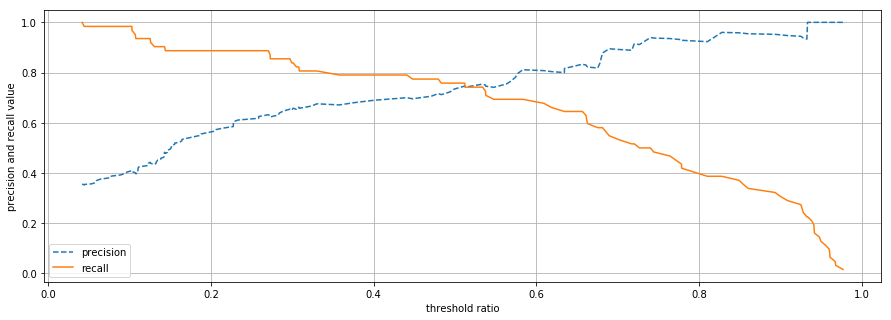

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_positive_label)

plt.figure(figsize=(15,5))

plt.plot(thresholds, precisions[0 : thresholds.shape[0]], linestyle='--', label='precision')
plt.plot(thresholds, recalls[0 : thresholds.shape[0]], label='recall')
# thresholds만 162, precisions, recalls는 163이기 때문에 162로 맞춰주는 작업을 했다.

plt.xlabel('threshold ratio')
plt.ylabel('precision and recall value')
plt.legend()
plt.grid()

plt.show()

## titanic을 이용한 생존자 예측 FPR, TPR, 임계값
- roc_curve(실제값, 예측확률 값) : FPR, TPR, 임계값

In [82]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측확률 추출
pred_positive_label = lr_model.predict_proba(X_test)[: , 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_positive_label)
# print(fprs.shape[0])
# print(tprs.shape[0])
# print(thresholds.shape[0])
# print(type(fprs))
# ndarray의 길이를 확인

print('샘플 추출')
print()
thr_idx = np.arange(1, thresholds.shape[0], 6)
print('thr idx : ', thr_idx)
print('thresholds value : ', thresholds[thr_idx])
print('fprs value : ', fprs[thr_idx])
print('tprs value : ', tprs[thr_idx])

# 출력 결과를 보면 임계값이 1에 가까울수록 FPR 값이 커지면서 TPR 도 커지는 것을 볼 수 있다.

56
56
56
<class 'numpy.ndarray'>
샘플 추출



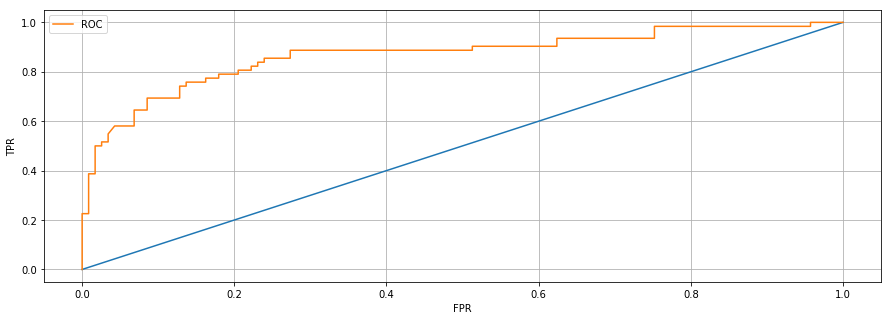

In [83]:
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

pred_positive_label = lr_model.predict_proba(X_test)[: , 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_positive_label)

plt.figure(figsize=(15,5))
# 대각선
plt.plot([0,1], [0,1])
# ROC
plt.plot(fprs, tprs, label='ROC')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()

plt.show()

In [84]:
from sklearn.metrics import  roc_auc_score
from sklearn.linear_model import  LogisticRegression

# 위 코드 확인 후
# 로지스틱 회귀
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
prediction = lr_model.predict(X_test)
print('roc auc value {}'.format(roc_auc_score(y_test, prediction)))

roc auc value 0.8106561896884479


# [실습]
>## 유방암 관련 데이터
- 재현율이 정확도보다 더 중요하다 (실제 P를 N으로 예측하면 안됨)
- 재현율은 실제 P를 P로 예측한 비율이므로 높을수록 좋은 성능모형이라 판단할 수 있다.

In [21]:
from sklearn.datasets import load_breast_cancer

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree     import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [22]:
cancer = load_breast_cancer()
print(type(cancer))

<class 'sklearn.utils.Bunch'>


In [23]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [24]:
# DataFrame으로 구조를 변경해서 확인해보자.

cancer_data = cancer.data

cancer_label = cancer.target

cancer_df = pd.DataFrame(data=cancer_data,
                      columns=cancer.feature_names)
display( cancer_df.head() )
cancer_df['target'] = cancer_label
print('*'*50)
display( cancer_df.head() )

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**************************************************


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [25]:
# 분류학습기 생성
rf_model = RandomForestClassifier()

# 데이터 세트 분리
label    = cancer_df['target']
features = cancer_df.drop(columns=['target'], axis=1)
print('label\n', label)
print('features\n', features)

label
 0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     1
20     1
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
539    1
540    1
541    1
542    1
543    1
544    1
545    1
546    1
547    1
548    1
549    1
550    1
551    1
552    1
553    1
554    1
555    1
556    1
557    1
558    1
559    1
560    1
561    1
562    0
563    0
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32
features
      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4   

In [26]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, f1_score

# 학습 및 평가 (교차 검증)
fold = KFold(n_splits=20,
             random_state=1,
             shuffle=True)

scoring = {'accuracy'  : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall'    : make_scorer(recall_score),
           'f1_score'  : make_scorer(f1_score)}

result = cross_validate(rf_model, features, label, cv=fold, scoring=scoring)

print(result.keys())

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1_score'])


In [27]:
# 평가지표에 대한 평균값
print('accuracy',  np.round(result['test_accuracy'].mean(), 2))
print('precision', np.round(result['test_precision'].mean(), 2))
print('recall',    np.round(result['test_recall'].mean(), 2))
print('f1_score',  np.round(result['test_f1_score'].mean(), 2))

# accuracy, precision, recall

accuracy 0.96
precision 0.96
recall 0.98
f1_score 0.97


In [28]:
# GridSearchCV 적용
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    test_size=0.2)



from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(random_state=123)


params = {
    'n_estimators' : [200, 300],
    'max_features' : [8, 10],
    'max_depth'    : [4, 6]
}


Grid_rf = GridSearchCV(random_forest, 
                       param_grid = params,
                       cv         = 3,
                       scoring    = 'recall')

Grid_rf.fit(X_train, y_train)
print(Grid_rf.best_params_)
print(Grid_rf.best_score_)

# {'max_depth': 4, 'max_features': 8, 'n_estimators': 200}
# 0.9669922669922671


# test set 예측

y_pred = Grid_rf.best_estimator_.predict(X_test)
# 모델성능평가 함수
def display_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print('accuracy' , accuracy)
    print('precision' , precision)
    print('recall' , recall)

display_eval(y_test, y_pred)

{'max_depth': 4, 'max_features': 8, 'n_estimators': 200}
0.9719298245614034
accuracy 0.9385964912280702
precision 0.9342105263157895
recall 0.9726027397260274


# 추가설명

In [29]:
# continuous_matrix

y_test = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

tp = tn = fp = fn = 0

for i in range(len(y_test)) :
    # TP
    if y_test[i] == 1 and y_pred[i] == 1 :
        tp += 1
    # TN
    if y_test[i] == 0 and y_pred[i] == 0 :
        tn += 1
    # FP
    if y_test[i] == 0 and y_pred[i] == 1 :
        fp += 1
    # FN
    if y_test[i] == 1 and y_pred[i] == 0 :
        fn += 1

In [30]:
# Accuracy
#        TP+TN
#     ---------
#     TP+TN+FP+FN
    
# Recall
#       TP
#     -----
#     TP+FN
    
# Precision
#       TP
#     -----
#     TP+FP
    
# F1 score
#        Precision * Recall
# 2  *  ------------------
#        Precision + Recall
    
# fallout(위 양성율)
# 실제 양성 클래스에 속하지 않는 표본 중에 양성 클래스에 속한다고 예측한 표본의 비율
# 낮아야 좋은 모형으로 본다.
# 거래 - 실제 정상거래인데 사기 거래 예측한 거래의 비율(False Positive Rate)
#        FP
#     -------
#     FP + TN